In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split

In [81]:
#Create a 2D cluster of 50 points with mean: 
number_points = 50
mean0 = (20, 30) #mean_x, mean_y
cov0 = [[3, 0], [0, 10]] #s_x = 3, s_y = 20
Data0 = np.random.multivariate_normal(mean0, cov0, number_points)   # red = 0
Data0 = np.concatenate((Data0, np.zeros((number_points, 1))), axis=1)
#Create a 2D cluster of 50 points with mean: 
mean1 = (40, 40) #mean_x, mean_y
cov1 = [[10, 0], [0, 10]] #s_x = 10, s_y = 10
Data1 = np.random.multivariate_normal(mean1, cov1, number_points)  # blue = 1
Data1 = np.concatenate((Data1, np.ones((number_points, 1))), axis=1)
#Create a 2D cluster of 50 points with mean: 
mean2 = (50, 40) #mean_x, mean_y
cov2 = [[15, 0], [0, 15]] #s_x = 15, s_y = 15
Data2= np.random.multivariate_normal(mean2, cov2, number_points)  # yellow = 2
Data2 = np.concatenate((Data2, 2*np.ones((number_points, 1))), axis=1)

In [82]:
Data = np.concatenate((Data0, Data1, Data2), axis=0)
features = Data[:, 0:2]
labels = Data[:, 2]

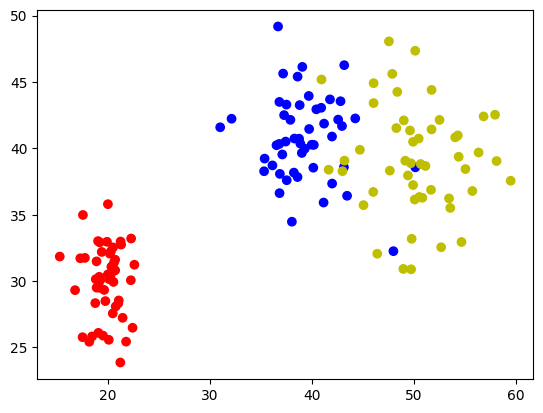

In [83]:
# Define a custom colormap
cmap = colors.ListedColormap(['r', 'b', 'y'])
# Plot the scatter plot with the custom colormap
plt.scatter(Data[:,0], Data[:,1], c=Data[:,2], cmap=cmap)
plt.show()

In [84]:
training_features, testing_features, training_labels, testing_labels = train_test_split(features, labels, test_size=0.3)
#print("\nTraining features: \n", training_features)
#print("\nTraining Labels: \n", training_labels) 
#print("\nTesting Labels: \n", testing_labels) 

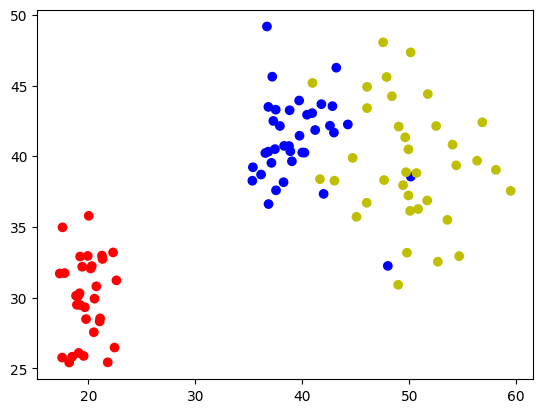

In [85]:
# plot train data
plt.scatter(training_features[:,0], training_features[:,1], c=training_labels, cmap=cmap)

In [86]:
# use KNN with K = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_features, training_labels)
predicted_labels = knn.predict(testing_features)
print ("\nPredicted class labels: \n", predicted_labels)
print("\nCorrect Testing class labels: \n", testing_labels)


Predicted class labels: 
 [0. 2. 2. 0. 0. 0. 2. 0. 2. 2. 0. 1. 1. 1. 2. 2. 2. 0. 0. 0. 2. 2. 0. 1.
 1. 0. 0. 0. 2. 2. 2. 2. 0. 1. 1. 2. 2. 0. 1. 0. 2. 0. 1. 0. 1.]

Correct Testing class labels: 
 [0. 2. 2. 0. 0. 0. 2. 0. 2. 1. 0. 1. 1. 1. 2. 2. 1. 0. 0. 0. 2. 2. 0. 1.
 1. 0. 0. 0. 2. 2. 2. 1. 0. 1. 1. 2. 2. 0. 1. 0. 2. 0. 1. 0. 1.]


In [87]:
print ("Test data where predicted label equals the test label: \n", testing_labels == predicted_labels)
number_correct = (testing_labels == predicted_labels).sum()
print ("\nNumber of correct predictions: %d. Out of total test cases %d." %(number_correct, testing_labels.shape[0]) )

Test data where predicted label equals the test label: 
 [ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True]

Number of correct predictions: 42. Out of total test cases 45.


In [88]:
# tatal accuracy
from sklearn.metrics import accuracy_score
accuracy_percent = accuracy_score(testing_labels, predicted_labels) * 100
print ("\nAccuracy: %5.2f%%" %accuracy_percent)


Accuracy: 93.33%


### In 3

In [89]:
neighbor_size = []
errors_list = []
best_k = 0
for k in range (2, 20): 
  classifier = KNeighborsClassifier(n_neighbors = k)
  model = classifier.fit(training_features,training_labels)  # or can also use:   predicted_labels = classifier.fit(train_features,train_labels) 
  predicted_labels = model.predict(testing_features)  #use the model obtained in previous step to predict labels for testing features
  accuracy_percent = accuracy_score(testing_labels, predicted_labels) * 100
  # Calculating the % Accuracy of the prediction. 
  print("Prediction Accuracy for k = %2d : %5.2f%%" % (k, accuracy_percent)) #%% escapes the formatting % to print '%'
  neighbor_size.append(k)
  errors_list.append(100-accuracy_percent)
  if min(errors_list):
    best_k = neighbor_size[errors_list.index(min(errors_list))]
#print (" K = ", neighbor_size, "\n", "Errors = ", errors_list)
print ("Best K = ", best_k)

Prediction Accuracy for k =  2 : 88.89%
Prediction Accuracy for k =  3 : 93.33%
Prediction Accuracy for k =  4 : 95.56%
Prediction Accuracy for k =  5 : 93.33%
Prediction Accuracy for k =  6 : 95.56%
Prediction Accuracy for k =  7 : 93.33%
Prediction Accuracy for k =  8 : 93.33%
Prediction Accuracy for k =  9 : 93.33%
Prediction Accuracy for k = 10 : 95.56%
Prediction Accuracy for k = 11 : 95.56%
Prediction Accuracy for k = 12 : 97.78%
Prediction Accuracy for k = 13 : 97.78%
Prediction Accuracy for k = 14 : 97.78%
Prediction Accuracy for k = 15 : 97.78%
Prediction Accuracy for k = 16 : 97.78%
Prediction Accuracy for k = 17 : 97.78%
Prediction Accuracy for k = 18 : 97.78%
Prediction Accuracy for k = 19 : 97.78%
Best K =  12


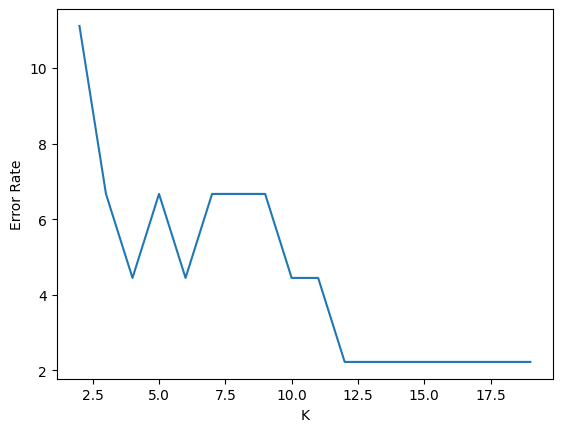

In [90]:
# plot the error rate vs. k
plt.plot(neighbor_size, errors_list)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [91]:
# use KNN with K = best_k
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(training_features, training_labels)
predicted_labels = knn.predict(testing_features)
print ("\nPredicted class labels use best k value: \n", predicted_labels)
print("\nCorrect Testing class labels use best k value: \n", testing_labels)


Predicted class labels use best k value: 
 [0. 2. 1. 0. 0. 0. 2. 0. 2. 1. 0. 1. 1. 1. 2. 2. 1. 0. 0. 0. 2. 2. 0. 1.
 1. 0. 0. 0. 2. 2. 2. 1. 0. 1. 1. 2. 2. 0. 1. 0. 2. 0. 1. 0. 1.]

Correct Testing class labels use best k value: 
 [0. 2. 2. 0. 0. 0. 2. 0. 2. 1. 0. 1. 1. 1. 2. 2. 1. 0. 0. 0. 2. 2. 0. 1.
 1. 0. 0. 0. 2. 2. 2. 1. 0. 1. 1. 2. 2. 0. 1. 0. 2. 0. 1. 0. 1.]


In [92]:
print ("Test data where predicted label equals the test label: \n", testing_labels == predicted_labels)
number_correct = (testing_labels == predicted_labels).sum()
print ("\nNumber of correct predictions: %d. Out of total test cases %d." %(number_correct, testing_labels.shape[0]) )

Test data where predicted label equals the test label: 
 [ True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]

Number of correct predictions: 44. Out of total test cases 45.


In [93]:
# tatal accuracy
from sklearn.metrics import accuracy_score
accuracy_percent = accuracy_score(testing_labels, predicted_labels) * 100
print ("\nAccuracy: %5.2f%%" %accuracy_percent)


Accuracy: 97.78%
